In [1]:
## IMPORTACIÓN GENERAL DE LIBRERIAS Y VISUALIZACIÓN DE DATOS (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as DT
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('default') 
sns.set(style="whitegrid") 
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
## target_competencia = pd.read_csv('target_competencia.csv')
## RECIÉN VA A SER UTILIZADO EN EL TP2. (COLUMNAS obj_Sc Y obj_St SON 0)

In [4]:
################################################################
## EVENTS.
################################################################
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
events= pd.read_csv('../../data/events.csv')
## TRANSFORMACIÓN DE TIPOS PARA EL CSV (EVENTS)
events['wifi'] = events['wifi'].fillna(False).astype(bool)
events['connection_type'] = events['connection_type'].astype('category')
events['trans_id'] = events['trans_id'].astype('category')
events['date'] = pd.to_datetime(events['date'], infer_datetime_format=True)
## DIFERENCIAMOS EN TRES COLUMNAS DIFERENTES EL DIA, MES Y AÑO.
events['mes'] = events['date'].dt.month
events['dia'] = events['date'].dt.day
events['hora'] = events['date'].dt.hour
## ARMAMOS UNA COLUMNA PARA EL DÍA DE LA SEMANA COMO NOMBRE.
events['nombre_dia'] = events['date'].dt.weekday_name
## PONEMOS LOS NOMBRES DE MANERA MÁS PROLIJA PARA LOS GRÁFICOS.
events.loc[events.nombre_dia.str.contains('Monday', na=False), 'nombre_dia'] = 'LUN'
events.loc[events.nombre_dia.str.contains('Tuesday', na=False), 'nombre_dia'] = 'MAR'
events.loc[events.nombre_dia.str.contains('Wednesday', na=False), 'nombre_dia'] = 'MIE'
events.loc[events.nombre_dia.str.contains('Thursday', na=False), 'nombre_dia'] = 'JUE'
events.loc[events.nombre_dia.str.contains('Friday', na=False), 'nombre_dia'] = 'VIE'
events.loc[events.nombre_dia.str.contains('Saturday', na=False), 'nombre_dia'] = 'SAB'
events.loc[events.nombre_dia.str.contains('Sunday', na=False), 'nombre_dia'] = 'DOM'
## ARMAMOS LOS NOMBRES DdiasemanaE LOS MESES.
events['nombre_mes'] = ''
events.loc[events.mes == 1, 'nombre_mes'] = 'ENERO'
events.loc[events.mes == 2, 'nombre_mes'] = 'FEBRERO'
events.loc[events.mes == 3, 'nombre_mes'] = 'MARZO'
events.loc[events.mes == 4, 'nombre_mes'] = 'ABRIL'
events.loc[events.mes == 5, 'nombre_mes'] = 'MAYO'
events.loc[events.mes == 6, 'nombre_mes'] = 'JUNIO'
# ARMAMOS UNA LÓGICA PARA SEGMENTAR LAS FRANJAS HORARIAS.
# MADRUGADA de 00 a 06
events['hora_madrugada'] = 0
events.loc[((events.hora > -1) & (events.hora < 7)), 'hora_madrugada'] = 1
# MAÑANA de 07 a 11
events['hora_maniana'] = 0
events.loc[((events.hora > 6) & (events.hora < 12)), 'hora_maniana'] = 1
# ALMUERZO de 12 a 13
events['hora_almuerzo'] = 0
events.loc[((events.hora > 11) & (events.hora < 14)), 'hora_almuerzo'] = 1
# TARDE de 14 a 18
events['hora_tarde'] = 0
events.loc[((events.hora > 13) & (events.hora < 19)), 'hora_tarde'] = 1
# NOCHE de 19 a 23
events['hora_noche'] = 0
events.loc[((events.hora > 18) & (events.hora < 24)), 'hora_noche'] = 1
# TRANSFORMAMOS EN CATEGÓRICAS EL DÍA DE LA SEMANA Y EL MES.
events['nombre_dia'] = events['nombre_dia'].astype('category')
events['nombre_mes'] = events['nombre_mes'].astype('category')
################################################################
################################################################

In [32]:
################################################################
## CLICKS.
################################################################
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
clicks = pd.read_csv('../../data/clicks.csv')
## TRANSFORMACIÓN DE TIPOS PARA EL CSV (CLICKS)
clicks['created'] = pd.to_datetime(clicks['created'], infer_datetime_format=True)
## DIFERENCIAMOS EN TRES COLUMNAS DIFERENTES EL DIA, MES Y AÑO.
clicks['mes'] = clicks['created'].dt.month
clicks['dia'] = clicks['created'].dt.day
clicks['hora'] = clicks['created'].dt.hour
## ARMAMOS UNA COLUMNA PARA EL DÍA DE LA SEMANA COMO NOMBRE.
clicks['nombre_dia'] = clicks['created'].dt.weekday_name
## PONEMOS LOS NOMBRES DE MANERA MÁS PROLIJA PARA LOS GRÁFICOS.
clicks.loc[clicks.nombre_dia.str.contains('Monday', na=False), 'nombre_dia'] = 'LUN'
clicks.loc[clicks.nombre_dia.str.contains('Tuesday', na=False), 'nombre_dia'] = 'MAR'
clicks.loc[clicks.nombre_dia.str.contains('Wednesday', na=False), 'nombre_dia'] = 'MIE'
clicks.loc[clicks.nombre_dia.str.contains('Thursday', na=False), 'nombre_dia'] = 'JUE'
clicks.loc[clicks.nombre_dia.str.contains('Friday', na=False), 'nombre_dia'] = 'VIE'
clicks.loc[clicks.nombre_dia.str.contains('Saturday', na=False), 'nombre_dia'] = 'SAB'
clicks.loc[clicks.nombre_dia.str.contains('Sunday', na=False), 'nombre_dia'] = 'DOM'
## ARMAMOS LOS NOMBRES DE LOS MESES.
clicks['nombre_mes'] = ''
clicks.loc[clicks.mes == 1, 'nombre_mes'] = 'ENERO'
clicks.loc[clicks.mes == 2, 'nombre_mes'] = 'FEBRERO'
clicks.loc[clicks.mes == 3, 'nombre_mes'] = 'MARZO'
clicks.loc[clicks.mes == 4, 'nombre_mes'] = 'ABRIL'
clicks.loc[clicks.mes == 5, 'nombre_mes'] = 'MAYO'
clicks.loc[clicks.mes == 6, 'nombre_mes'] = 'JUNIO'
# ARMAMOS UNA LÓGICA PARA SEGMENTAR LAS FRANJAS HORARIAS.
# MADRUGADA de 00 a 06
clicks['hora_madrugada'] = 0
clicks.loc[((clicks.hora > -1) & (clicks.hora < 7)), 'hora_madrugada'] = 1
# MAÑANA de 07 a 11
clicks['hora_maniana'] = 0
clicks.loc[((clicks.hora > 6) & (clicks.hora < 12)), 'hora_maniana'] = 1
# ALMUERZO de 12 a 13
clicks['hora_almuerzo'] = 0
clicks.loc[((clicks.hora > 11) & (clicks.hora < 14)), 'hora_almuerzo'] = 1
# TARDE de 14 a 18
clicks['hora_tarde'] = 0
clicks.loc[((clicks.hora > 13) & (clicks.hora < 19)), 'hora_tarde'] = 1
# NOCHE de 19 a 23
clicks['hora_noche'] = 0
clicks.loc[((clicks.hora > 18) & (clicks.hora < 24)), 'hora_noche'] = 1
# TRANSFORMAMOS EN CATEGÓRICAS EL DÍA DE LA SEMANA Y EL MES.
clicks['nombre_dia'] = clicks['nombre_dia'].astype('category')
clicks['nombre_mes'] = clicks['nombre_mes'].astype('category')
################################################################
################################################################

In [39]:
################################################################
## INSTALLS.
################################################################
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
installs = pd.read_csv('../../installs.csv')
## TRANSFORMACIÓN DE TIPOS PARA EL CSV (INSTALLS)
installs['kind'] = installs['kind'].astype('category')
installs['user_agent'] = installs['user_agent'].astype('category')
installs['session_user_agent'] = installs['session_user_agent'].astype('category')
installs['created'] = pd.to_datetime(installs['created'], infer_datetime_format=True)
installs['trans_id'] = installs['trans_id'].astype('category')
## DIFERENCIAMOS EN TRES COLUMNAS DIFERENTES EL DIA, MES Y AÑO.
installs['mes'] = installs['created'].dt.month
installs['dia'] = installs['created'].dt.day
installs['hora'] = installs['created'].dt.hour
## ARMAMOS UNA COLUMNA PARA EL DÍA DE LA SEMANA COMO NOMBRE.
installs['nombre_dia'] = installs['created'].dt.weekday_name
## PONEMOS LOS NOMBRES DE MANERA MÁS PROLIJA PARA LOS GRÁFICOS.
installs.loc[installs.nombre_dia.str.contains('Monday', na=False), 'nombre_dia'] = 'LUN'
installs.loc[installs.nombre_dia.str.contains('Tuesday', na=False), 'nombre_dia'] = 'MAR'
installs.loc[installs.nombre_dia.str.contains('Wednesday', na=False), 'nombre_dia'] = 'MIE'
installs.loc[installs.nombre_dia.str.contains('Thursday', na=False), 'nombre_dia'] = 'JUE'
installs.loc[installs.nombre_dia.str.contains('Friday', na=False), 'nombre_dia'] = 'VIE'
installs.loc[installs.nombre_dia.str.contains('Saturday', na=False), 'nombre_dia'] = 'SAB'
installs.loc[installs.nombre_dia.str.contains('Sunday', na=False), 'nombre_dia'] = 'DOM'
## ARMAMOS LOS NOMBRES DE LOS MESES.
installs['nombre_mes'] = ''
installs.loc[installs.mes == 1, 'nombre_mes'] = 'ENERO'
installs.loc[installs.mes == 2, 'nombre_mes'] = 'FEBRERO'
installs.loc[installs.mes == 3, 'nombre_mes'] = 'MARZO'
installs.loc[installs.mes == 4, 'nombre_mes'] = 'ABRIL'
installs.loc[installs.mes == 5, 'nombre_mes'] = 'MAYO'
installs.loc[installs.mes == 6, 'nombre_mes'] = 'JUNIO'
# ARMAMOS UNA LÓGICA PARA SEGMENTAR LAS FRANJAS HORARIAS.
# MADRUGADA de 00 a 06
installs['hora_madrugada'] = 0
installs.loc[((installs.hora > -1) & (installs.hora < 7)), 'hora_madrugada'] = 1
# MAÑANA de 07 a 11
installs['hora_maniana'] = 0
installs.loc[((installs.hora > 6) & (installs.hora < 12)), 'hora_maniana'] = 1
# ALMUERZO de 12 a 13
installs['hora_almuerzo'] = 0
installs.loc[((installs.hora > 11) & (installs.hora < 14)), 'hora_almuerzo'] = 1
# TARDE de 14 a 18
installs['hora_tarde'] = 0
installs.loc[((installs.hora > 13) & (installs.hora < 19)), 'hora_tarde'] = 1
# NOCHE de 19 a 23
installs['hora_noche'] = 0
installs.loc[((installs.hora > 18) & (installs.hora < 24)), 'hora_noche'] = 1
# TRANSFORMAMOS EN CATEGÓRICAS EL DÍA DE LA SEMANA Y EL MES.
installs['nombre_dia'] = installs['nombre_dia'].astype('category')
installs['nombre_mes'] = installs['nombre_mes'].astype('category')
################################################################
################################################################

In [41]:
installs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 28 columns):
created               3412 non-null datetime64[ns]
application_id        3412 non-null int64
ref_type              3412 non-null int64
ref_hash              3412 non-null int64
click_hash            0 non-null float64
attributed            3412 non-null bool
implicit              3412 non-null bool
device_countrycode    3412 non-null int64
device_brand          1047 non-null float64
device_model          3411 non-null float64
session_user_agent    3364 non-null category
user_agent            1729 non-null category
event_uuid            865 non-null object
kind                  865 non-null category
wifi                  1729 non-null object
trans_id              6 non-null category
ip_address            3412 non-null int64
device_language       3378 non-null float64
mes                   3412 non-null int64
dia                   3412 non-null int64
hora                  3412 non-n

In [42]:
installs['ref_hash'].value_counts()

5208834946313176321    4
3272750442824629569    4
1999001885916451618    3
2457547163021424058    3
2515049144505739996    3
5376622639905210608    3
470581161921490835     3
2807966731127456435    3
394181128078904930     3
1332624341050561368    3
8209340170282049305    3
1826618012885478111    3
6207088909238189318    3
4603142710878547974    3
4587898421740190562    3
3429460795301152906    3
1838099903940931904    3
808602801225309575     3
2756309363004630634    3
5716316704073038128    3
1951826604052927528    3
5707101515634134793    3
3293250764324184935    3
6697381140026413622    2
1051816244049516468    2
2429923283539157643    2
8378288095655268347    2
4049391409413329307    2
1162390149017457197    2
8956666120381022264    2
                      ..
432026705480919604     1
868940215859934734     1
4424921869962083331    1
667593224187123722     1
826262859425189535     1
3807326297196549242    1
453115979634562298     1
2987878111541902309    1
3081130218041894318    1


In [40]:
installs_hora_madrugada = installs[installs['hora_madrugada'] == 1]
installs_hora_maniana = installs[installs['hora_maniana'] == 1]
installs_hora_almuerzo = installs[installs['hora_almuerzo'] == 1]
installs_hora_tarde = installs[installs['hora_tarde'] == 1]
installs_hora_noche = installs[installs['hora_noche'] == 1]

In [3]:
################################################################
## AUCTIONS.
################################################################
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
auctions = pd.read_csv('../../auctions.csv',nrows=5000000)
## TRANSFORMACIÓN DE TIPOS PARA EL CSV (AUCTIONS)
auctions['date'] = pd.to_datetime(auctions['date'], infer_datetime_format=True)
## DIFERENCIAMOS EN TRES COLUMNAS DIFERENTES EL DIA, MES Y AÑO.
auctions['mes'] = auctions['date'].dt.month
auctions['dia'] = auctions['date'].dt.day
auctions['hora'] = auctions['date'].dt.hour
## ARMAMOS UNA COLUMNA PARA EL DÍA DE LA SEMANA COMO NOMBRE.
auctions['nombre_dia'] = auctions['date'].dt.weekday_name
## PONEMOS LOS NOMBRES DE MANERA MÁS PROLIJA PARA LOS GRÁFICOS.
auctions.loc[auctions.nombre_dia.str.contains('Monday', na=False), 'nombre_dia'] = 'LUN'
auctions.loc[auctions.nombre_dia.str.contains('Tuesday', na=False), 'nombre_dia'] = 'MAR'
auctions.loc[auctions.nombre_dia.str.contains('Wednesday', na=False), 'nombre_dia'] = 'MIE'
auctions.loc[auctions.nombre_dia.str.contains('Thursday', na=False), 'nombre_dia'] = 'JUE'
auctions.loc[auctions.nombre_dia.str.contains('Friday', na=False), 'nombre_dia'] = 'VIE'
auctions.loc[auctions.nombre_dia.str.contains('Saturday', na=False), 'nombre_dia'] = 'SAB'
auctions.loc[auctions.nombre_dia.str.contains('Sunday', na=False), 'nombre_dia'] = 'DOM'
## ARMAMOS LOS NOMBRES DE LOS MESES.
auctions['nombre_mes'] = ''
auctions.loc[auctions.mes == 1, 'nombre_mes'] = 'ENERO'
auctions.loc[auctions.mes == 2, 'nombre_mes'] = 'FEBRERO'
auctions.loc[auctions.mes == 3, 'nombre_mes'] = 'MARZO'
auctions.loc[auctions.mes == 4, 'nombre_mes'] = 'ABRIL'
auctions.loc[auctions.mes == 5, 'nombre_mes'] = 'MAYO'
auctions.loc[auctions.mes == 6, 'nombre_mes'] = 'JUNIO'
# ARMAMOS UNA LÓGICA PARA SEGMENTAR LAS FRANJAS HORARIAS.
# MADRUGADA de 00 a 06
auctions['hora_madrugada'] = 0
auctions.loc[((auctions.hora > -1) & (auctions.hora < 7)), 'hora_madrugada'] = 1
# MAÑANA de 07 a 11
auctions['hora_maniana'] = 0
auctions.loc[((auctions.hora > 6) & (auctions.hora < 12)), 'hora_maniana'] = 1
# ALMUERZO de 12 a 13
auctions['hora_almuerzo'] = 0
auctions.loc[((auctions.hora > 11) & (auctions.hora < 14)), 'hora_almuerzo'] = 1
# TARDE de 14 a 18
auctions['hora_tarde'] = 0
auctions.loc[((auctions.hora > 13) & (auctions.hora < 19)), 'hora_tarde'] = 1
# NOCHE de 19 a 23
auctions['hora_noche'] = 0
auctions.loc[((auctions.hora > 18) & (auctions.hora < 24)), 'hora_noche'] = 1
# TRANSFORMAMOS EN CATEGÓRICAS EL DÍA DE LA SEMANA Y EL MES.
auctions['nombre_dia'] = auctions['nombre_dia'].astype('category')
auctions['nombre_mes'] = auctions['nombre_mes'].astype('category')
################################################################
################################################################

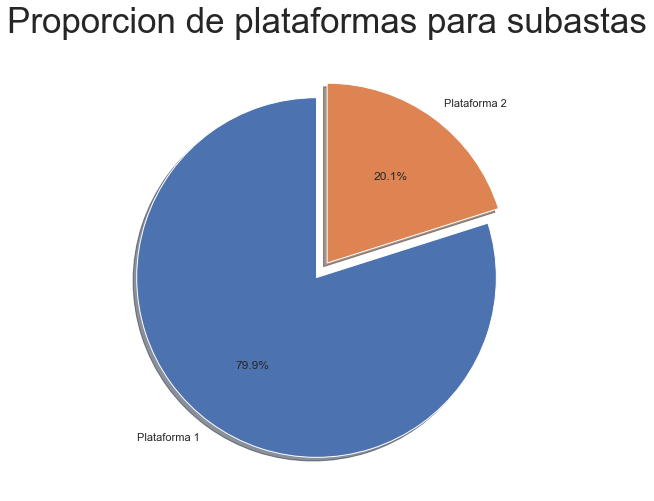

In [121]:
#1 3994655
#2 1005345

#Obtenemos las cantidades por plataforma
plataforma1 = (auctions[auctions['platform'] == 1]).platform.count()
plataforma2 = auctions[auctions['platform'] == 2].platform.count()

#Solo tenemos 2 plataformas que no sabemos los nombres, solo un ID.
sizes = [plataforma1, plataforma2]
nombres = ['Plataforma 1','Plataforma 2']

# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))
plt.title('Proporcion de plataformas para subastas', fontsize=35)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.1, 0))
plt.show()

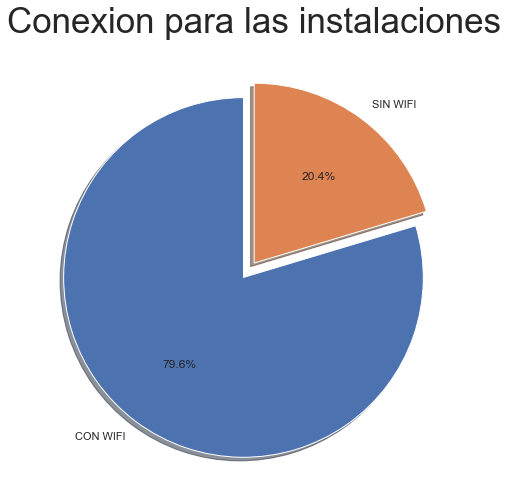

In [122]:
#Wifi 1377
#No wifi 352

##Obtenemos cuantas instalaciones se hicieron por wifi y cuantas no
wifi_si = installs[installs['wifi'] == True].wifi.count()
wifi_no = installs[installs['wifi'] == False].wifi.count()

sizes = [wifi_si, wifi_no]
nombres = ['CON WIFI','SIN WIFI']

# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))
plt.title('Conexion para las instalaciones', fontsize=35)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.1, 0))
plt.show()

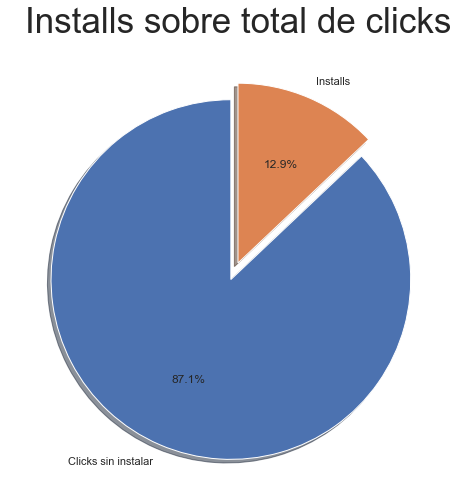

In [117]:
#installs_totales 3412
#clicks_totales 26351

#Sabiendo que se instalaron que de los 26351 clicks, 3412 fueron installs
installs_totales = installs.created.count()
clicks_sin_installs = clicks.created.count() - installs_totales

sizes = [clicks_sin_installs, installs_totales]
nombres = ['Clicks sin instalar','Installs']

# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))
plt.title('Installs sobre total de clicks', fontsize=35)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.1, 0))
plt.show()

Text(0, 0.5, 'Cantidad de instalaciones')

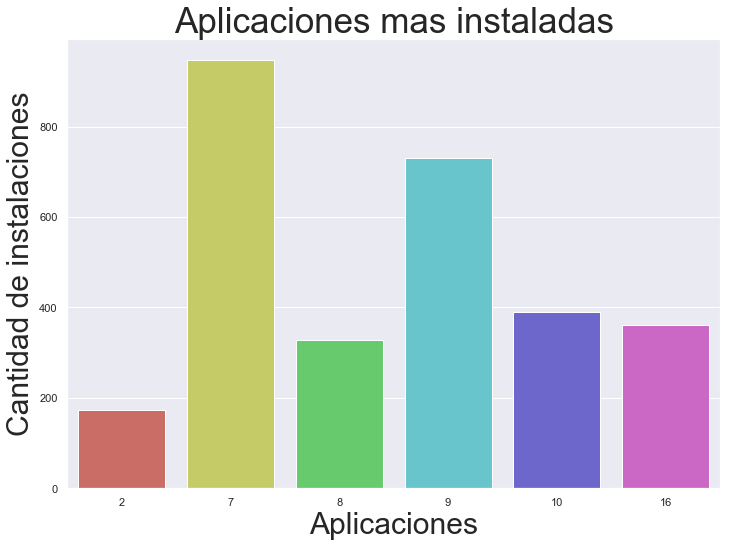

In [129]:
## GRAFICAMOS LAS APLICACIONES MAS INSTALADAS.
#installs_top['application_id'].value_counts()
#7     947
#9     731
#10    389
#16    362
#8     328
#2     174

aplicaciones_mas_instaladas = list([7, 9, 10, 16, 8, 2])
installs_top = installs[installs['application_id'].isin(aplicaciones_mas_instaladas)]
installs_top['application_id'].value_counts()

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.countplot(x="application_id", data=installs_top, palette="hls")
g.set_title("Aplicaciones mas instaladas", fontsize=35)
g.set_xlabel("Aplicaciones", fontsize=30)
g.set_ylabel("Cantidad de instalaciones", fontsize=30)

Text(0, 0.5, 'Cantidad de clicks')

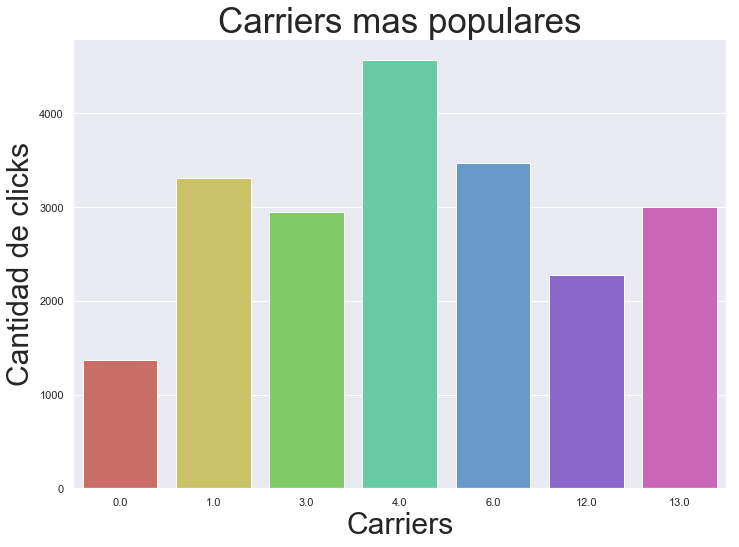

In [132]:
## GRAFICAMOS LAS APLICACIONES MAS INSTALADAS.
#clicks_top['carrier_id'].value_counts()
#4.0     4569
#6.0     3474
#1.0     3307
#13.0    2998
#3.0     2944
#12.0    2273
#0.0     1368

carrier_tops = list([4,6,1,13,3,12,0])
clicks_top = clicks[clicks['carrier_id'].isin(carrier_tops)]
clicks_top['carrier_id'].value_counts()

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.countplot(x="carrier_id", data=clicks_top, palette="hls")
g.set_title("Carriers mas populares", fontsize=35)
g.set_xlabel("Carriers", fontsize=30)
g.set_ylabel("Cantidad de clicks", fontsize=30)

Text(0, 0.5, 'Cantidad de subastas')

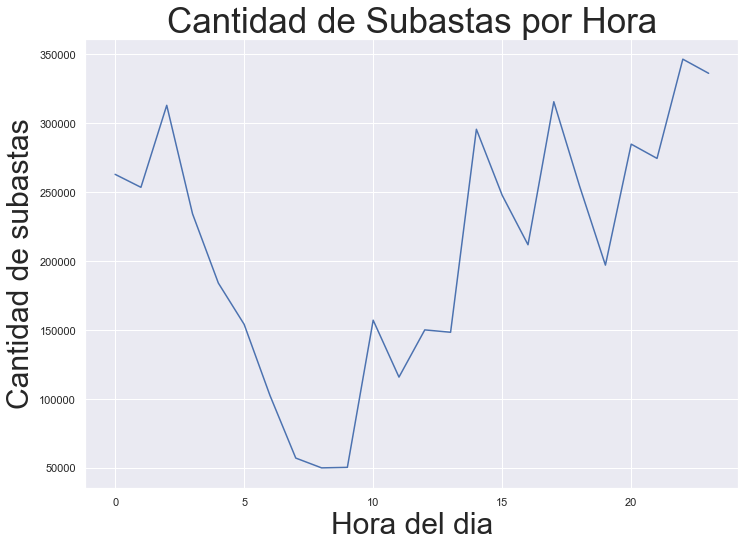

In [133]:
sns.set(style="darkgrid")

subastas_por_hora = auctions.groupby('hora').count()[['source_id']].reset_index()

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.lineplot(x=subastas_por_hora['hora'], y=subastas_por_hora['source_id'])
g.set_title("Cantidad de Subastas por Hora", fontsize=35)
g.set_xlabel("Hora del dia", fontsize=30)
g.set_ylabel("Cantidad de subastas", fontsize=30)

In [144]:
auctions.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id,mes,dia,hora,nombre_dia,nombre_mes,hora_madrugada,hora_maniana,hora_almuerzo,hora_tarde,hora_noche,cantidades_por_hora
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0,3,11,14,LUN,MARZO,0,0,0,1,0,0.0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0,3,11,14,LUN,MARZO,0,0,0,1,0,1.0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0,3,11,14,LUN,MARZO,0,0,0,1,0,2.0
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0,3,11,14,LUN,MARZO,0,0,0,1,0,3.0
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0,3,11,14,LUN,MARZO,0,0,0,1,0,4.0


Text(0, 0.5, 'Cantidad de subastas')

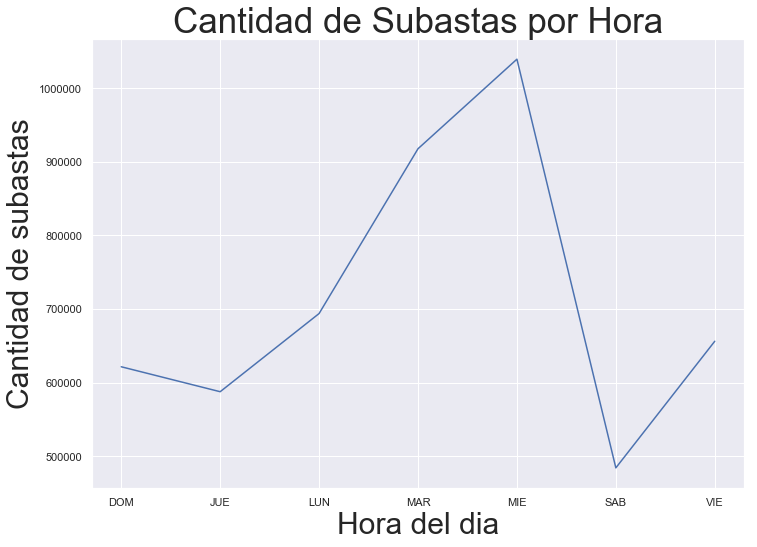

In [147]:
sns.set(style="darkgrid")

subastas_por_hora = auctions.groupby('nombre_dia').count()[['source_id']].reset_index()

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.lineplot(x=subastas_por_hora['nombre_dia'], y=subastas_por_hora['source_id'])
g.set_title("Cantidad de Subastas por Hora", fontsize=35)
g.set_xlabel("Hora del dia", fontsize=30)
g.set_ylabel("Cantidad de subastas", fontsize=30)

In [156]:
clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26351 entries, 0 to 26350
Data columns (total 31 columns):
advertiser_id      26351 non-null int64
action_id          0 non-null float64
source_id          26351 non-null int64
created            26351 non-null datetime64[ns]
country_code       26351 non-null int64
latitude           26351 non-null float64
longitude          26351 non-null float64
wifi_connection    26351 non-null bool
carrier_id         26340 non-null float64
trans_id           26351 non-null object
os_minor           26339 non-null float64
agent_device       3243 non-null float64
os_major           26339 non-null float64
specs_brand        26351 non-null int64
brand              6235 non-null float64
timeToClick        22977 non-null float64
touchX             23011 non-null float64
touchY             23011 non-null float64
ref_type           26351 non-null int64
ref_hash           26351 non-null int64
mes                26351 non-null int64
dia                26351 n

In [162]:
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 18 columns):
auction_type_id        float64
country                int64
date                   datetime64[ns]
device_id              int64
platform               int64
ref_type_id            int64
source_id              int64
mes                    int64
dia                    int64
hora                   int64
nombre_dia             category
nombre_mes             category
hora_madrugada         int64
hora_maniana           int64
hora_almuerzo          int64
hora_tarde             int64
hora_noche             int64
cantidades_por_hora    float64
dtypes: category(2), datetime64[ns](1), float64(2), int64(13)
memory usage: 619.9 MB


In [163]:
auctions['device_id'].value_counts()

633139769114048761     6166
7202276635029175071    6116
6302840482782120473    4833
7298861376107043945    4692
5376802567578262905    4455
8963711959081981780    3958
519658456951133298     3173
795159065504552200     3127
5384039226444052914    3023
1800317677967270083    2931
3198179064438296471    2836
201759600719985554     2762
6841615430383729819    2742
9027154272484048876    2635
8751190726444323885    2584
2435544514359302887    2573
320899491737875154     2463
5051610571898428259    2462
1835469468095030098    2453
68016455690089173      2416
6392567838173461255    2379
7650408579713341483    2285
7574657722181550308    2267
921959630147363933     2267
5011494377920136656    2263
6203407103275384250    2242
4421235276885576274    2209
4834359787191717922    2197
1478017482044456084    2168
5572535908724397544    2155
                       ... 
5783767781985660134       1
7610548691867001711       1
5836178770716573308       1
9197222389523657251       1
9002655542752819832 

Text(0,0.5,'Cantidad de subastas')

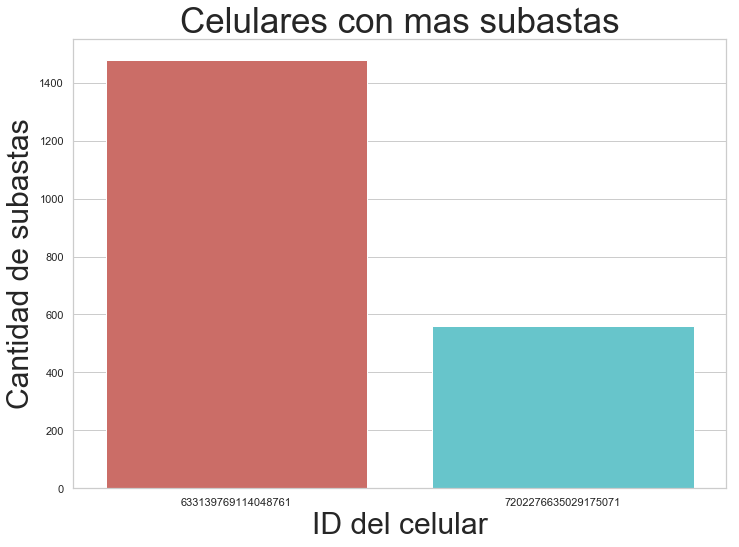

In [24]:
##auctions['device_id'].value_counts()
#633139769114048761     6166
#7202276635029175071    6116
#6302840482782120473    4833
#7298861376107043945    4692
#5376802567578262905    4455

#device_tops = list([633139769114048761, 7202276635029175071, 6302840482782120473, 7298861376107043945, 5376802567578262905])
device_tops = list([633139769114048761, 7202276635029175071])

auctions_top = auctions[(auctions['device_id'].isin(device_tops)) & (auctions['nombre_dia'] == 'MAR')]

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.countplot(x="device_id", data=auctions_top, palette="hls")
g.set_title("Celulares con mas subastas", fontsize=35)
g.set_xlabel("ID del celular", fontsize=30)
g.set_ylabel("Cantidad de subastas", fontsize=30)

In [65]:
sns.set(style="darkgrid")

subastas_por_hora = auctions.groupby('nombre_dia').count()[['source_id']].reset_index()



device_tops = list([633139769114048761, 7202276635029175071, 6302840482782120473, 7298861376107043945, 5376802567578262905])

device3 = list([6302840482782120473])
auctions3 = auctions[(auctions['device_id'].isin(device3))]
device4 = list([7298861376107043945])
auctions4 = auctions[(auctions['device_id'].isin(device4))]
device5 = list([5376802567578262905])
auctions5 = auctions[(auctions['device_id'].isin(device5))]

Text(0,0.5,'Cantidad de subastas')

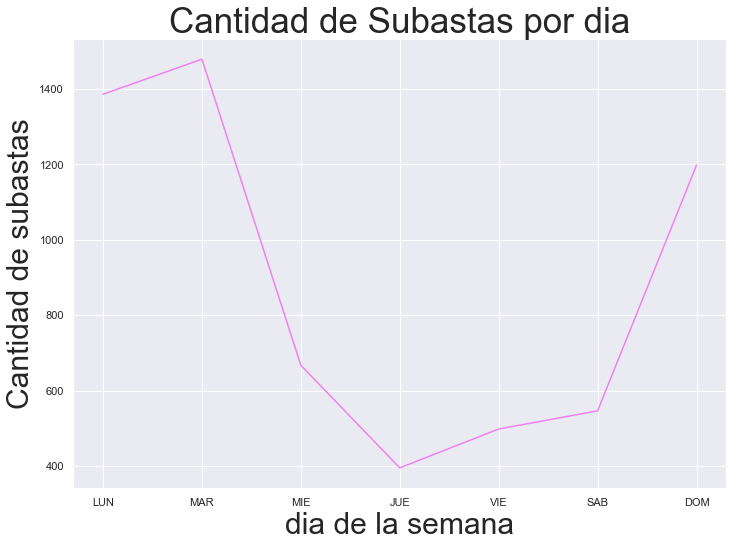

In [66]:

device1 = list([633139769114048761])
auctions1 = auctions[(auctions['device_id'].isin(device1))]
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)


auctions1 = auctions1.groupby('nombre_dia').count()[['device_id']].reset_index()

auctions1['nombre_dia'] = pd.Categorical(auctions1['nombre_dia'], categories=['LUN','MAR','MIE','JUE','VIE','SAB', 'DOM'])
auctions1.index = pd.CategoricalIndex(auctions1.index, categories= ["LUN", "MAR", "MIE", "JUE", "VIE", "SAB", "DOM"])
auctions1.sortlevel(level=0, inplace=True)

g = sns.lineplot(x="nombre_dia", y="device_id", data=auctions1, color='violet')
g.set_title("Cantidad de Subastas por dia", fontsize=35)
g.set_xlabel("dia de la semana", fontsize=30)
g.set_ylabel("Cantidad de subastas", fontsize=30)

Text(0,0.5,'Cantidad de subastas')

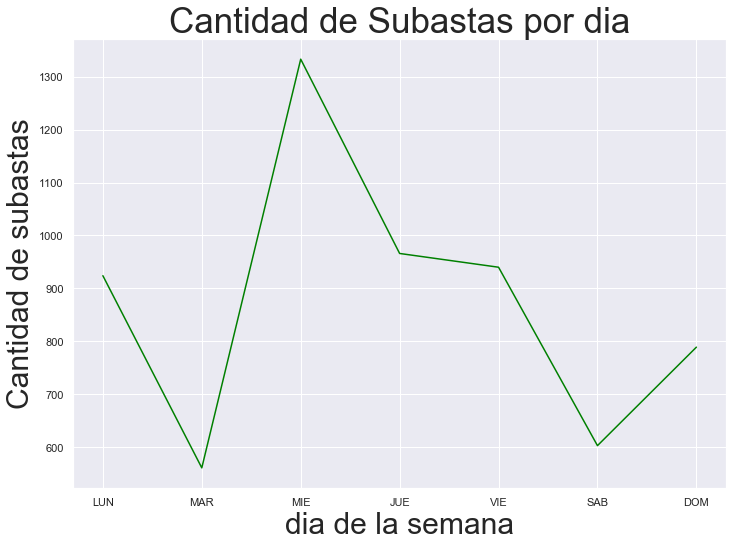

In [68]:

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
device2 = list([7202276635029175071])
auctions2 = auctions[(auctions['device_id'].isin(device2))]


auctions2['nombre_dia'] = pd.Categorical(auctions2['nombre_dia'], categories=['LUN','MAR','MIE','JUE','VIE','SAB', 'DOM'])
auctions2.index = pd.CategoricalIndex(auctions2.index, categories= ["LUN", "MAR", "MIE", "JUE", "VIE", "SAB", "DOM"])
auctions2.sortlevel(level=0, inplace=True)

auctions2 = auctions2.groupby('nombre_dia').count()[['device_id']].reset_index()
g = sns.lineplot(x="nombre_dia", y="device_id", data=auctions2, color='green')
g.set_title("Cantidad de Subastas por dia", fontsize=35)
g.set_xlabel("dia de la semana", fontsize=30)
g.set_ylabel("Cantidad de subastas", fontsize=30)

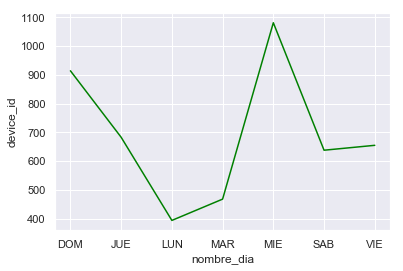

In [36]:

auctions3 = auctions3.groupby('nombre_dia').count()[['device_id']].reset_index()
ax = sns.lineplot(x="nombre_dia", y="device_id", data=auctions3, color='green')

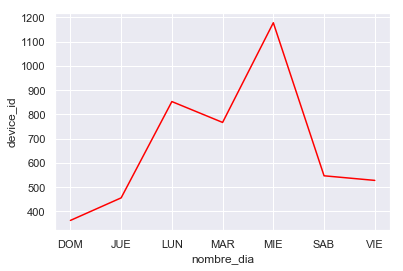

In [37]:
auctions4 = auctions4.groupby('nombre_dia').count()[['device_id']].reset_index()
ax = sns.lineplot(x="nombre_dia", y="device_id", data=auctions4, color='red')

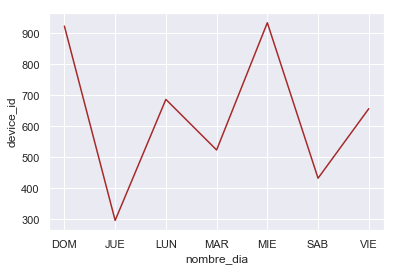

In [47]:
auctions5 = auctions5.groupby('nombre_dia').count()[['device_id']].reset_index()
ax = sns.lineplot(x="nombre_dia", y="device_id", data=auctions5, color='brown')

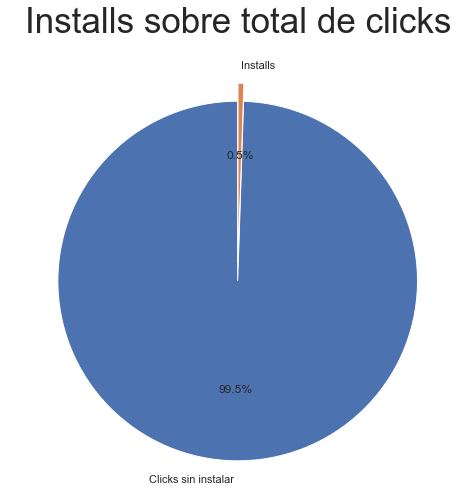

In [159]:
#subastas_totales 5000000
#clicks_totales 26351

#Sabiendo que se instalaron que de los 26351 clicks, 3412 fueron installs
installs_totales = 26351
clicks_sin_installs = 5000000

sizes = [clicks_sin_installs, installs_totales]
nombres = ['Clicks sin instalar','Installs']

# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))
plt.title('Installs sobre total de clicks', fontsize=35)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', shadow=False, startangle=90, explode=(0.1, 0))
plt.show()